In [2]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
entire_name_file = "entire_data.csv"
entire_data = pd.read_csv(entire_name_file)
# Hiển thị tất cả các dòng
# pd.set_option('display.max_rows', None)

# # Hiển thị tất cả các cột
# pd.set_option('display.max_columns', None)
data_train = entire_data.iloc[:]
data_test = entire_data.iloc[:]

# Tách các đặc trưng và nhãn
X = data_train.drop('label', axis=1)  # Các đặc trưng
y = data_train['label']  # Nhãn
# print(X)
# print(y)


# print(y_test.head())

In [7]:
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# Xác định input_dim
input_dim = X_train.shape[1]
print(input_dim)
# Khởi tạo mô hình Sequential
model = Sequential()
# Giảm số lượng neurons trong các lớp Dense
model.add(Dense(16, input_dim=input_dim, activation='relu'))  # Giảm từ 32 xuống 16
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))  # Giảm từ 16 xuống 8
model.add(Dense(1, activation='sigmoid'))  # Lớp đầu ra

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Hiển thị thông tin mô hình
model.summary()

24


c:\Users\phung\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=500,  # Số lượng epoch có thể thay đổi tùy theo yêu cầu
    batch_size=32,  # Kích thước batch có thể thay đổi tùy theo yêu cầu
    validation_data=(X_test, y_test),  # Dữ liệu kiểm tra để đánh giá mô hình
    verbose=1  # Hiển thị quá trình huấn luyện
)
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2304 - loss: 2.1458 - val_accuracy: 0.2037 - val_loss: 1.4106
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2415 - loss: 1.6318 - val_accuracy: 0.2037 - val_loss: 1.0977
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2729 - loss: 1.3710 - val_accuracy: 0.2037 - val_loss: 0.8755
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3365 - loss: 1.1864 - val_accuracy: 0.4815 - val_loss: 0.7258
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4599 - loss: 0.9198 - val_accuracy: 0.7037 - val_loss: 0.6365
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4865 - loss: 0.8508 - val_accuracy: 0.7963 - val_loss: 0.5812
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5355 - loss: 0.7941 - val_accuracy: 0.7963 - val_loss: 0.5471
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5017 - loss: 0.8179 - val_accuracy: 0.7963 - val_loss: 0.5301

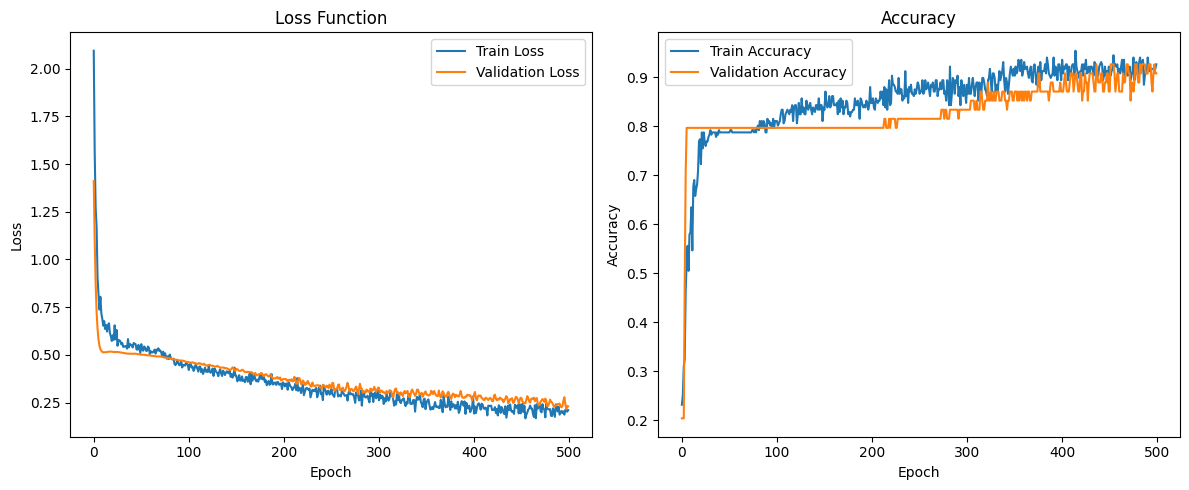

In [9]:
# Vẽ biểu đồ giá trị loss function trong quá trình huấn luyện
plt.figure(figsize=(12, 5))

# Biểu đồ hàm loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
chinh xac :: 260/270


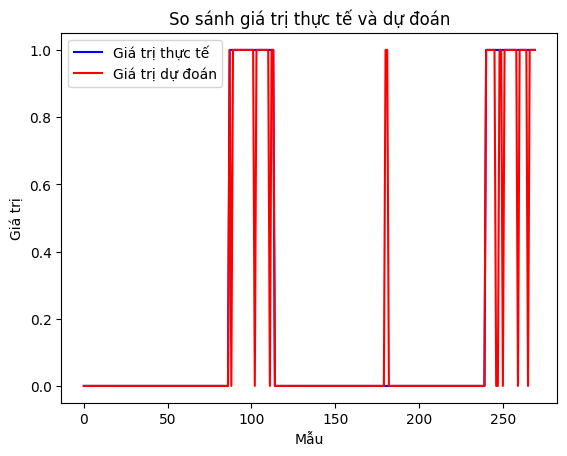

In [10]:
# Tách các đặc trưng và nhãn
X_data_test = data_test.drop('label', axis=1)  # Các đặc trưng
y_data_test = data_test['label']  # Nhãn

# Dự đoán dựa trên dữ liệu kiểm tra (X_test) hoặc dữ liệu mới (X_new)
predictions = model.predict(X_data_test)

# Hoặc nếu bạn có dữ liệu mới để dự đoán
# predictions = model.predict(X_new)

# In kết quả dự đoán
# print(predictions)
# Giả sử predictions là kết quả dự đoán và y_test là nhãn thực tế
# Chuyển đổi nếu cần thiết cho hồi quy (ví dụ: scale các giá trị)
predictions = predictions.flatten()  # Đảm bảo cùng định dạng với y_test nếu cần
predictions2 = []

y_data_test = y_data_test.reset_index(drop=True)

for d in predictions:
    if d > 0.5:
        predictions2.append(1)
    else:
        predictions2.append(0)

# Vẽ biểu đồ so sánh
# plt.figure(figsize=(10, 6))

exactly = 0

for i in range(len(predictions2)):
    if predictions2[i] == y_data_test[i]:
        exactly = exactly + 1

print(f"chinh xac :: {exactly}/{len(predictions2)}")


# Vẽ giá trị thực tế
plt.plot(y_data_test, label='Giá trị thực tế', color='blue')

# Vẽ giá trị dự đoán
plt.plot(predictions2, label='Giá trị dự đoán', color='red')

# Thiết lập tiêu đề và nhãn
plt.title('So sánh giá trị thực tế và dự đoán')
plt.xlabel('Mẫu')
plt.ylabel('Giá trị')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [1]:
# Lưu mô hình
model.save('my_model.h5')

NameError: name 'model' is not defined

In [11]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [15]:
from tensorflow.keras.models import save_model, load_model

In [19]:
# Load mô hình từ TensorFlow/Keras
keras_file = "./model_apena.h5"
save_model(model, keras_file)
model = load_model(keras_file)

# Chuyển đổi mô hình sang định dạng TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

name_tflite = './model_apena'
name_model = './model_apena'
# Lưu mô hình TensorFlow Lite xuống file
with open(name_tflite + '.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\phung\AppData\Local\Temp\tmp9xym81wg\assets


INFO:tensorflow:Assets written to: C:\Users\phung\AppData\Local\Temp\tmp9xym81wg\assets


Saved artifact at 'C:\Users\phung\AppData\Local\Temp\tmp9xym81wg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 24), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1976781238544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977454757488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977455245120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977455245824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977464769344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977464770224: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [20]:
# Write TFLite model to a C source (or header) file
with open(name_tflite + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, name_tflite))

In [21]:
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path = "./model_apena.tflite")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0])
print("Output Type:", output_details[0]['dtype'])

Input Shape: {'name': 'serving_default_input_layer_1:0', 'index': 0, 'shape': array([ 1, 24]), 'shape_signature': array([-1, 24]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
Input Type: <class 'numpy.float32'>
Output Shape: {'name': 'StatefulPartitionedCall_1:0', 'index': 10, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
Output Type: <class 'numpy.float32'>
